#### MNIST Hand written digit classification
Here goal is compared with different Optimizer and Observe its effect and Hyperparameter

In [1]:
print("hello")

hello


In [20]:
# Importing Libaries
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as k
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.optimizers import SGD

In [6]:
# Load dataset
from keras.datasets import mnist

In [7]:
# Split the dataset
(X_train , y_train) , (X_test , y_test)=mnist.load_data()

In [8]:
# Shape of the dataset
print(X_train.shape , y_train.shape)

(60000, 28, 28) (60000,)


In [10]:
# Reshape of the dataset
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
num_classes=10
y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
X_train=X_train/255
X_test=X_test/255

In [14]:
print('X_train.shape', X_test.shape)
print(X_train.shape[0],'Train Sample')
print(X_test.shape[0],'Test Sample')

X_train.shape (10000, 28, 28, 1)
60000 Train Sample
10000 Test Sample


##### First model

In [17]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
print(model.summary())


# Model training
history = model.fit(X_train,y_train , batch_size=1024,epochs=10,verbose=1,validation_data=(X_test,y_test)) 
print("The Model has Successfully Trained")
     
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=1)
print('test loss:',score[0])
print('test accuracy:',score[1])


     


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2359552   
                                                      

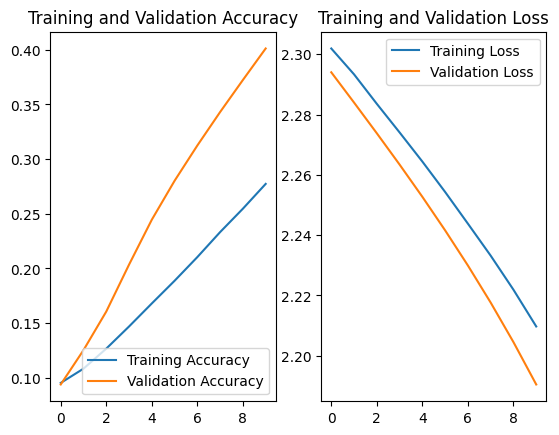

In [19]:
import os
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(os.path.join('Img-classification-plots/1.png'))
plt.show()

##### With another optimizer
sgd = SGD(lr=0.01, momentum=0.9)

In [21]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(lr=0.01, momentum=0.9),metrics=['accuracy'])
print(model.summary())


# Model training
history = model.fit(X_train,y_train , batch_size=1024,epochs=10,verbose=1,validation_data=(X_test,y_test)) 
print("The Model has Successfully Trained")
     
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=1)
print('test loss:',score[0])
print('test accuracy:',score[1])


     


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2359552   
                                                      

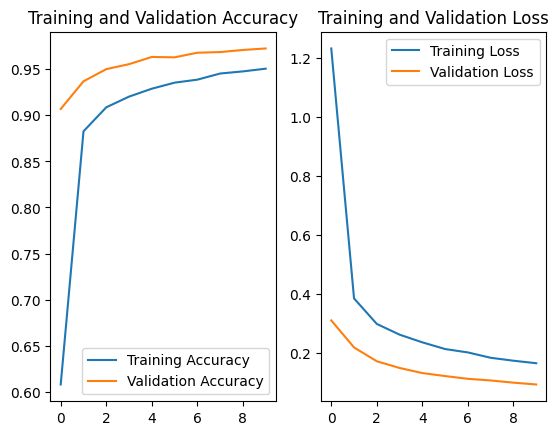

In [22]:
import os
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(os.path.join('Img-classification-plots/Mini batch DG.png'))
plt.show()

#### For ada grad Adagrad(learning_rate=0.01)

In [23]:
from keras.optimizers import Adagrad
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adagrad(learning_rate=0.01),metrics=['accuracy'])
print(model.summary())


# Model training
history = model.fit(X_train,y_train , batch_size=1024,epochs=10,verbose=1,validation_data=(X_test,y_test)) 
print("The Model has Successfully Trained")
     
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=1)
print('test loss:',score[0])
print('test accuracy:',score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2359552   
                                                      

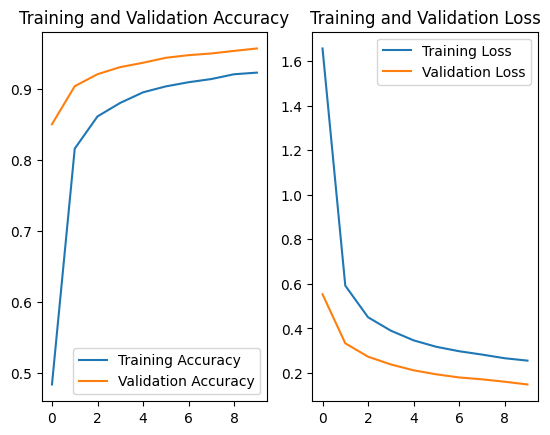

In [24]:
import os
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(os.path.join('Img-classification-plots/Ada-Grad.png'))
plt.show()

#### For RMSprop RMSprop(learning_rate=0.001, rho=0.9)

In [25]:
from keras.optimizers import RMSprop
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=RMSprop(learning_rate=0.001, rho=0.9),metrics=['accuracy'])
print(model.summary())


# Model training
history = model.fit(X_train,y_train , batch_size=1024,epochs=10,verbose=1,validation_data=(X_test,y_test)) 
print("The Model has Successfully Trained")
     
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=1)
print('test loss:',score[0])
print('test accuracy:',score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2359552   
                                                      

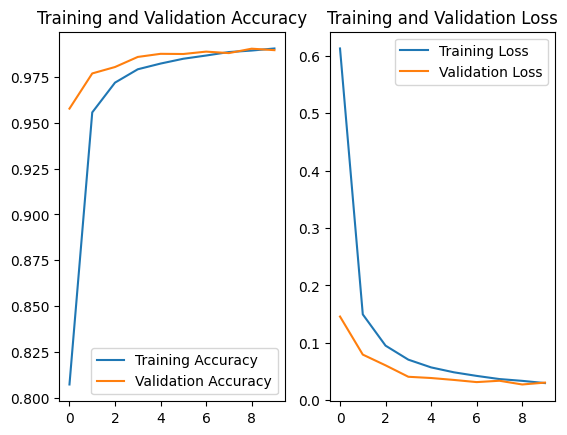

In [26]:
import os
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(os.path.join('Img-classification-plots/RMSprop.png'))
plt.show()

#### For adam Adam(learning_rate=0.001)

In [27]:
from keras.optimizers import Adam
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
print(model.summary())


# Model training
history = model.fit(X_train,y_train , batch_size=1024,epochs=10,verbose=1,validation_data=(X_test,y_test)) 
print("The Model has Successfully Trained")
     
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=1)
print('test loss:',score[0])
print('test accuracy:',score[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               2359552   
                                                      

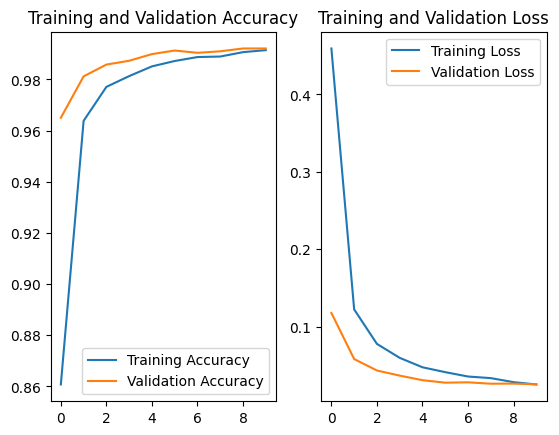

In [28]:
import os
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(os.path.join('Img-classification-plots/Adam.png'))
plt.show()

###### For ada delta we got loss: 2.2097 - accuracy: 0.2772 - val_loss: 2.1905 - val_accuracy: 0.4011  time:19:54 Min
###### For Mini bBatch we got loss: 0.1655 - accuracy: 0.9505 - val_loss: 0.0934 - val_accuracy: 0.9724 time:19:07 Min
###### For ada grade we got loss: 0.2557 - accuracy: 0.9226 - val_loss: 0.1487 - val_accuracy: 0.9566  time:19:19 Min
###### For RSMProp  we got loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0306 - val_accuracy: 0.9896  time:18:50 Min
###### For adam  we got loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0284 - val_accuracy: 0.9904  time:20:38
###### For below with BN and regular added laeyr we got loss: 0.2125 - accuracy: 0.9819 - val_loss: 0.4096 - val_accuracy: 0.9780 time:20:17
###### For rsmprop with increase in cnn layers loss: 0.1388 - accuracy: 0.9862 - val_loss: 1.4551 - val_accuracy: 0.3828 time:28:27
###### Above with ADAM loss: 0.1494 - accuracy: 0.9861 - val_loss: 0.4134 - val_accuracy: 0.9633  time:23:25

##### Add BatchNormalization layer and Use regulaization l2

In [29]:
from keras.optimizers import Adam
from keras.layers import Dense, BatchNormalization
from keras.regularizers import l2

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.01)),)
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization()) #addded BN layers
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(BatchNormalization())  #added BN Layers
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
print(model.summary())


# Model training
history = model.fit(X_train,y_train , batch_size=1024,epochs=10,verbose=1,validation_data=(X_test,y_test)) 
print("The Model has Successfully Trained")
     
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=1)
print('test loss:',score[0])
print('test accuracy:',score[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 9216)             

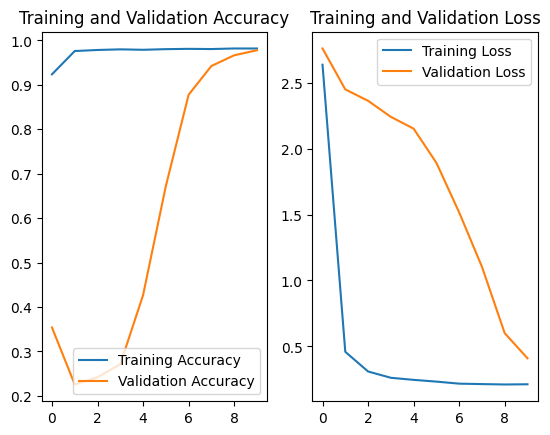

In [30]:
import os
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(os.path.join('Img-classification-plots/Adam-with-BN-reg.png'))
plt.show()


#### RSMprop with increase cnn layers

In [31]:
from keras.layers import Dense, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import RMSprop

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization()) #addded BN layers
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(BatchNormalization())  #added BN Layers
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=RMSprop(learning_rate=0.001, rho=0.9),metrics=['accuracy'])
print(model.summary())


# Model training
history = model.fit(X_train,y_train , batch_size=1024,epochs=10,verbose=1,validation_data=(X_test,y_test)) 
print("The Model has Successfully Trained")
     
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=1)
print('test loss:',score[0])
print('test accuracy:',score[1])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_2 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 128)        

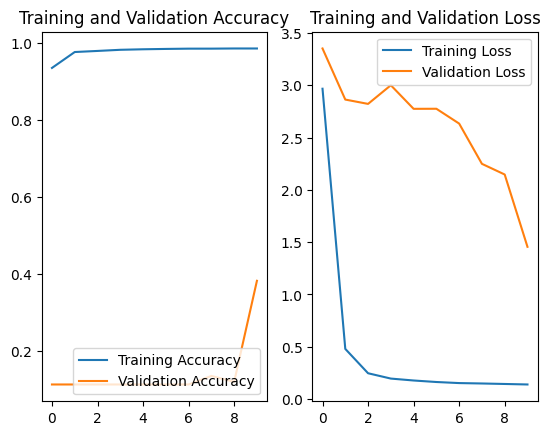

In [32]:
import os
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(os.path.join('Img-classification-plots/RMSprop-with-BN-reg.png'))
plt.show()

In [ ]:
##### above cnn with adam

In [34]:
from keras.layers import Dense, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.01)))
#model.add(BatchNormalization()) #addded BN layers
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(BatchNormalization())  #added BN Layers
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
print(model.summary())


# Model training
history = model.fit(X_train,y_train , batch_size=1024,epochs=10,verbose=1,validation_data=(X_test,y_test)) 
print("The Model has Successfully Trained")
     
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=1)
print('test loss:',score[0])
print('test accuracy:',score[1])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_8 (Bat  (None, 5, 5, 128)       

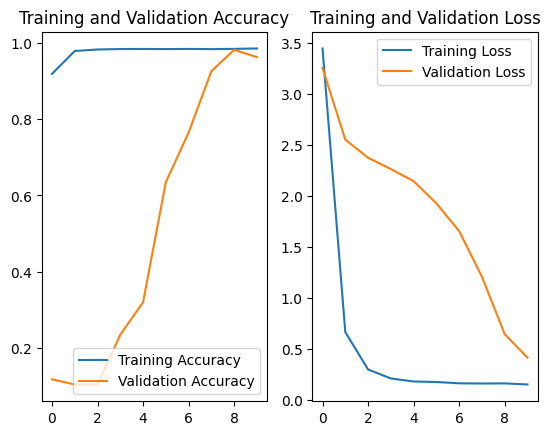

In [35]:
import os
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(os.path.join('Img-classification-plots/Adam-with-BN-reg-cnn.png'))
plt.show()